In [7]:
%reset -f

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # Import tqdm for the loading bar

In [2]:
# import all OptionMetrics Data

# Define file paths
optionprices_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\SPX500\AllScreenedOptionData.csv'
securityprices_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\SPX500\SPX500SecurityPricesOptionMetrics.csv'
dividend_yield_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\SPX500\DividendSPX500.csv'
fama_french_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\Mapping and FF5\F-F_Research_Data_5_Factors_2x3_daily.CSV'
crsp_mapping = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\Mapping and FF5\OptionMetricsToCSRPMapping.csv'

# Define data type mapping for optionprices columns
dtype_mapping_option = {
    'secid': 'int64',
    'date': 'object',
    'symbol': 'object',
    'exdate': 'object',
    'last_date': 'object',
    'cp_flag': 'object',
    'strike_price': 'float64',
    'best_bid': 'float64',
    'best_offer': 'float64',
    'volume': 'int64',
    'open_interest': 'int64',
    'impl_volatility': 'float64',
    'delta': 'float64',
    'gamma': 'float64',
    'vega': 'float64',
    'theta': 'float64',
    'optionid': 'int64',
    'cfadj': 'int64',
    'am_settlement': 'int64',
    'contract_size': 'int64',
    'ss_flag': 'int64',
    'expiry_indicator': 'object',
    'root': 'object',
    'exercise_style': 'object'
}

# Define data type mapping for securityprices columns
dtype_mapping_sec = {
    'secid': 'int64',
    'date': 'object',
    'low': 'float64',
    'high': 'float64',
    'open': 'float64',
    'close': 'float64',
    'volume': 'int64',
    'return': 'float64',
    'cfadj': 'float64',
    'shrout': 'int64',
    'cfret': 'float64'
}

# Define dtype mapping based on provided information
dtype_mapping_div = {
    'secid': 'int64',
    'date': 'object',
    'cusip': 'int64',
    'ticker': 'object',
    'sic': 'int64',
    'index_flag': 'int64',
    'exchange_d': 'int64',
    'class': 'float64',
    'issue_type': 'object',
    'industry_group': 'float64',
    'rate': 'float64'
}

# Define dtype mapping for Fama French 5 Factors columns
dtype_mapping_ff5 = {
    'Date': 'object',
    'Mkt-RF': 'float64',
    'SMB': 'float64',
    'HML': 'float64',
    'RMW': 'float64',
    'CMA': 'float64',
    'RF': 'float64'
}


# Specify columns to include for optionprices
columns_to_include_option = ['secid', 'date', 'symbol', 'exdate', 'cp_flag', 'strike_price',
                             'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility', 'delta',
                             'gamma', 'vega', 'theta', 'am_settlement', 'contract_size',
                             'ss_flag', 'expiry_indicator', 'exercise_style']

# Import optionprices data and sort
optionprice_data = pd.read_csv(optionprices_path, usecols=columns_to_include_option, dtype=dtype_mapping_option)
# Step 2: Group the DataFrame by 'secid' and 'date', then sort each group by 'strike_price'
grouped = optionprice_data.groupby(['secid', 'date']).apply(lambda x: x.sort_values('strike_price'))

# Step 3: Define a function to calculate delta_k based on the new definition
def calculate_delta_k(group):
    strike_prices = group['strike_price'].values
    delta_k = [strike_prices[i+1] - strike_prices[i] if i == 0 else
               strike_prices[i] - strike_prices[i-1] if i == len(strike_prices) - 1 else
               (strike_prices[i+1] - strike_prices[i-1]) / 2 for i in range(len(strike_prices))]
    return delta_k

# Step 4: Apply the function to each group and explode the resulting list
delta_k_series = grouped.groupby(level=[0,1]).apply(calculate_delta_k).explode()

# Step 5: Reset the index of delta_k_series
delta_k_series = delta_k_series.reset_index(drop=True)

# Step 6: Create a new column with the calculated delta_k values
optionprice_data['delta_k'] = delta_k_series.astype(float)
optionprice_data['strike_price'] = optionprice_data['strike_price'] / 1000  # To adjust back to normal strike price, in the OptionMetrics database the strike price is multiplied by 1000
optionprice_data['best_bid'] = optionprice_data['best_bid'] / optionprice_data['contract_size']  # I want to use the price of a single option
optionprice_data['best_offer'] = optionprice_data['best_offer'] / optionprice_data['contract_size']  # Again I want to use the price of a single

# Import securityprices data and sort
security_columns = ['secid', 'date', 'low', 'high', 'open', 'close', 'volume', 'return', 'cfadj', 'shrout', 'cfret']
security_prices = pd.read_csv(securityprices_path, usecols=security_columns, dtype=dtype_mapping_sec)
security_prices.sort_values(by=['date', 'secid'], inplace=True)


# Read the CSV file into a DataFrame with specified data types
dividend_yield_columns = ['secid', 'date', 'rate', 'ticker']
dividend_yield_data = pd.read_csv(dividend_yield_path, usecols = dividend_yield_columns ,dtype=dtype_mapping_div)
dividend_yield_data.sort_values(by=['date', 'secid'], inplace=True)

# Read the Fama French 5 Factors data into a DataFrame with specified data types and date parsing
fama_french_data = pd.read_csv(fama_french_path, dtype=dtype_mapping_ff5, parse_dates=['Date'])

# Display the first few rows of each DataFrame
print("Option Prices:")
print(optionprice_data.head())

print("\nSecurity Prices:")
print(security_prices.head())

# Display the first few rows of the DataFrame
print("\nDividend yield data")
print(dividend_yield_data.head())

print("\nFama-French head is :")
print(fama_french_data.head())



MemoryError: 

In [ ]:
# Function to merge OptionMetrics data in chunks and write to CSV file
def merge_data_in_chunks_and_write(dataframes, chunk_size, on_columns, output_path):
    total_rows = len(dataframes[0])  # Total number of rows
    total_chunks = (total_rows // chunk_size) + 1  # Calculate total number of chunks
    
    with tqdm(total=total_chunks, desc="Merging Data") as pbar:  # Initialize tqdm progress bar
        merged_chunks = []
        for i in range(0, total_rows, chunk_size):
            chunk_end = min(i + chunk_size, total_rows)
            chunk = dataframes[0].iloc[i:chunk_end]
            for df in dataframes[1:]:
                chunk = pd.merge(chunk, df.iloc[i:chunk_end], on=on_columns, how='left')
            merged_chunks.append(chunk)
            pbar.update(1)  # Update progress bar
        
        merged_df = pd.concat(merged_chunks, ignore_index=True)
        merged_df.to_csv(output_path, index=False)  # Write to CSV without index

# Define chunk size
chunk_size = 10000

# Define output path for the merged data CSV file
output_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\AllOptionMetricsDataSPX500.csv'

# List of dataframes to merge
dataframes_to_merge = [optionprice_data, security_prices, dividend_yield_data]

# Define columns to merge on
on_columns = ['secid', 'date']

# Merge data in chunks and write to CSV file
merge_data_in_chunks_and_write(dataframes_to_merge, chunk_size, on_columns, output_path)

# Merge Fama French 5 Factors dataset onto the options based on 'date' only
all_data = pd.read_csv(output_path)  # Read the merged data
all_data['date'] = pd.to_datetime(all_data['date'], format='%Y-%m-%d')  # Convert 'date' column to datetime format
fama_french_data['Date'] = pd.to_datetime(fama_french_data['Date'], format='%Y%m%d')  # Convert 'Date' column to datetime format
all_data = pd.merge(all_data, fama_french_data, left_on='date', right_on='Date', how='left')  # Merge based on 'date'
all_data.drop(columns=['Date'], inplace=True)  # Drop the redundant 'Date' column

# Print the dimensions of the DataFrame
print("\nDimensions of the updated DataFrame:")
print("Number of rows:", all_data.shape[0])
print("Number of columns:", all_data.shape[1])

Merging Data: 100%|██████████| 12/12 [00:01<00:00, 10.06it/s]



Dimensions of the updated DataFrame:
Number of rows: 115877
Number of columns: 40


In [346]:
#Merge The PERMNO of CRSP onto the data
# Define the file path for the mapping document
mapping_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\Mapping and FF5\OptionMetricsToCSRPMapping.csv'

# Define data type mapping for the mapping document
dtype_mapping_mapping = {
    'secid': 'int64',
    'PERMNO': 'float64',
}

# Read the mapping document
crsp_opt_cols = ['secid', 'PERMNO']
mapping_data = pd.read_csv(mapping_path, usecols=crsp_opt_cols, dtype=dtype_mapping_mapping)

# Merge the mapping data onto the OptionMetrics data based on secid
all_data = pd.merge(all_data, mapping_data, on='secid', how='left')

# Display the first few rows of the merged data
print(all_data.head())


    secid       date             symbol      exdate cp_flag  strike_price  \
0  101594 2023-01-03  AAPL 230120C35000  2023-01-20       C          35.0   
1  101594 2023-01-03  AAPL 230120C40000  2023-01-20       C          40.0   
2  101594 2023-01-03  AAPL 230217C45000  2023-02-17       C          45.0   
3  101594 2023-01-03  AAPL 230113C50000  2023-01-13       C          50.0   
4  101594 2023-01-03  AAPL 230120C50000  2023-01-20       C          50.0   

   best_bid  best_offer  volume_x  open_interest  ...      shrout     cfret  \
0    0.9020      0.9055         0            642  ...  15908100.0  131.4069   
1    0.8520      0.8555         0           1007  ...  15908100.0  131.4069   
2    0.8020      0.8070         0             49  ...  15908100.0  131.4069   
3    0.7520      0.7550         1              1  ...  15908100.0  131.4069   
4    0.7525      0.7550        12           3917  ...  15908100.0  131.4069   

   rate  Mkt-RF   SMB   HML   RMW   CMA     RF   PERMNO  
0   

In [347]:
#Merge the Security from CRSP  price over the data
# Define the file path for the security price data
crsp_price_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\SPX500\SecuritiesSPX500CRSP.csv'

# Define data type mapping for the security price data
dtype_mapping_security_price = {
    'PERMNO': 'float64',
    'date': 'object',  # Change to 'datetime64' if 'date' is in datetime format
    'PRC': 'float64',
}

# Read the security price data
security_cols = ['PERMNO', 'date', 'PRC']
crsp_price_data = pd.read_csv(crsp_price_path, usecols=security_cols, dtype=dtype_mapping_security_price)

# Convert 'date' column to datetime format if needed
crsp_price_data['date'] = pd.to_datetime(crsp_price_data['date'])

# Merge the security price data onto the all_data DataFrame based on PERMNO and date
all_data = pd.merge(all_data, crsp_price_data, on=['PERMNO', 'date'], how='left')

# Display the first few rows of the merged data
print(all_data.head())

all_data.to_csv(output_path, index=False)  # Save the merged data to CSV without index
all_data = pd.read_csv(output_path)  # Read the merged data


    secid       date             symbol      exdate cp_flag  strike_price  \
0  101594 2023-01-03  AAPL 230120C35000  2023-01-20       C          35.0   
1  101594 2023-01-03  AAPL 230120C40000  2023-01-20       C          40.0   
2  101594 2023-01-03  AAPL 230217C45000  2023-02-17       C          45.0   
3  101594 2023-01-03  AAPL 230113C50000  2023-01-13       C          50.0   
4  101594 2023-01-03  AAPL 230120C50000  2023-01-20       C          50.0   

   best_bid  best_offer  volume_x  open_interest  ...     cfret  rate  Mkt-RF  \
0    0.9020      0.9055         0            642  ...  131.4069   NaN   -0.47   
1    0.8520      0.8555         0           1007  ...  131.4069   NaN   -0.47   
2    0.8020      0.8070         0             49  ...  131.4069   NaN   -0.47   
3    0.7520      0.7550         1              1  ...  131.4069   NaN   -0.47   
4    0.7525      0.7550        12           3917  ...  131.4069   NaN   -0.47   

    SMB   HML   RMW   CMA     RF   PERMNO     PRC 

In [348]:
# Impute NaN values in 'rate' column with the mean
rate_mean = all_data['rate'].mean()
all_data['rate'].fillna(0, inplace=True)

In [349]:
# Add S_0, F_0 and tau.
# Step 7: Calculate tau (time to expiration) as the difference between exdate and date
all_data['tau'] = (pd.to_datetime(all_data['exdate']) - all_data['date']).dt.days

# Step 8: Calculate S_0 as the average of 'open' and 'close' prices
all_data['S_0'] = all_data['PRC']

# Step 9: Calculate F_0 using the formula F_0 = S_0 * e^((r - q) * tau)
# Assuming r = 'RF' and q = 'rate'
all_data['F_0'] = all_data['S_0'] * np.exp((all_data['RF'] - all_data['rate']) * (np.mean(all_data['tau']) / 365))

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(all_data.head())


First few rows of the updated DataFrame:
    secid       date             symbol      exdate cp_flag  strike_price  \
0  101594 2023-01-03  AAPL 230120C35000  2023-01-20       C          35.0   
1  101594 2023-01-03  AAPL 230120C40000  2023-01-20       C          40.0   
2  101594 2023-01-03  AAPL 230217C45000  2023-02-17       C          45.0   
3  101594 2023-01-03  AAPL 230113C50000  2023-01-13       C          50.0   
4  101594 2023-01-03  AAPL 230120C50000  2023-01-20       C          50.0   

   best_bid  best_offer  volume_x  open_interest  ...   SMB   HML   RMW   CMA  \
0    0.9020      0.9055         0            642  ...  0.05 -0.12  0.25  0.52   
1    0.8520      0.8555         0           1007  ...  0.05 -0.12  0.25  0.52   
2    0.8020      0.8070         0             49  ...  0.05 -0.12  0.25  0.52   
3    0.7520      0.7550         1              1  ...  0.05 -0.12  0.25  0.52   
4    0.7525      0.7550        12           3917  ...  0.05 -0.12  0.25  0.52   

      RF

In [350]:
#Drop ALL the arbitrage options violating the conditions specified in my paper in the data section

# Define a function to calculate present value of dividends or strike price
def present_value(amount, rate, tau):
    return amount * np.exp(-rate * tau / 365)

# Define a function to check arbitrage conditions and return True if violated, False otherwise
def check_arbitrage(row):
    if row['cp_flag'] == 'C':
        if row['exercise_style'] == 'A':
            condition = max(0, row['S_0'] - row['strike_price'], row['S_0'] - present_value(row['strike_price'], row['rate'], row['tau']) - present_value(row['PRC'] * row['rate'], row['RF'], row['tau']))
            return row['best_bid'] < condition
        elif row['exercise_style'] == 'E':
            condition = max(0, row['S_0'] - present_value(row['strike_price'], row['rate'], row['tau']) - present_value(row['PRC'] * row['rate'], row['RF'], row['tau']))
            return row['best_bid'] < condition
    elif row['cp_flag'] == 'P':
        if row['exercise_style'] == 'A':
            condition = max(0, row['strike_price'] - row['S_0'], present_value(row['strike_price'], row['rate'], row['tau']) + present_value(row['PRC'] * row['rate'], row['RF'], row['tau']) - row['S_0'])
            return row['best_bid'] < condition
        elif row['exercise_style'] == 'E':
            condition = max(0, present_value(row['strike_price'], row['rate'], row['tau']) + present_value(row['PRC'] * row['rate'], row['RF'], row['tau']) - row['S_0'])
            return row['best_bid'] < condition
    return False

# Apply the function to each row of the DataFrame to create a boolean mask
arbitrage_mask = all_data.apply(check_arbitrage, axis=1)

# Drop rows that violate arbitrage conditions
all_data = all_data[~arbitrage_mask]

# Display the first few rows of the DataFrame after dropping arbitrage options
print("\nFirst few rows of the DataFrame after dropping arbitrage options:")
print(all_data.head())

# Print the dimensions of the DataFrame after dropping arbitrage options
print("\nDimensions of the DataFrame after dropping arbitrage options:")
print("Number of rows:", all_data.shape[0])
print("Number of columns:", all_data.shape[1])



First few rows of the DataFrame after dropping arbitrage options:
      secid       date              symbol      exdate cp_flag  strike_price  \
122  101594 2023-01-03  AAPL 230217C125000  2023-02-17       C         125.0   
123  101594 2023-01-03  AAPL 230317C125000  2023-03-17       C         125.0   
124  101594 2023-01-03  AAPL 230421C125000  2023-04-21       C         125.0   
127  101594 2023-01-03  AAPL 230127C126000  2023-01-27       C         126.0   
129  101594 2023-01-03  AAPL 230203C126000  2023-02-03       C         126.0   

     best_bid  best_offer  volume_x  open_interest  ...   SMB   HML   RMW  \
122    0.0755      0.0760      9554           3479  ...  0.05 -0.12  0.25   
123    0.0905      0.0920      2116          24434  ...  0.05 -0.12  0.25   
124    0.1080      0.1095      3500           2191  ...  0.05 -0.12  0.25   
127    0.0500      0.0515       242             51  ...  0.05 -0.12  0.25   
129    0.0600      0.0615       456            103  ...  0.05 -0.12

In [351]:
# Write the datafile into a csv
all_data.to_csv(output_path, index=False)  # Save the merged data to CSV without index
all_data = pd.read_csv(output_path)  # Read the merged data
# Print the dimensions of the DataFrame
print("\nDimensions of the updated DataFrame:")
print("Number of rows:", all_data.shape[0])
print("Number of columns:", all_data.shape[1])


Dimensions of the updated DataFrame:
Number of rows: 106120
Number of columns: 45


In [352]:
# Import all data from a csv file
# Define output path for the merged data CSV file
alldata_path = r'C:\Users\markr\OneDrive\Documents\Quantitative Finance\Master Thesis\data\AllOptionMetricsDataSPX500.csv'

# Define dtype mapping based on provided information
dtype_mapping = {
    'secid': 'int64',
    'date': 'object',
    'symbol': 'object',
    'exdate': 'object',
    'cp_flag': 'object',
    'strike_price': 'float64',
    'best_bid': 'float64',
    'best_offer': 'float64',
    'volume_x': 'int64',
    'open_interest': 'int64',
    'impl_volatility': 'float64',
    'delta': 'float64',
    'gamma': 'float64',
    'vega': 'float64',
    'theta': 'float64',
    'optionid': 'int64',
    'cfadj_x': 'int64',
    'am_settlement': 'int64',
    'contract_size': 'int64',
    'ss_flag': 'int64',
    'expiry_indicator': 'object',
    'root': 'float64',
    'exercise_style': 'object',
    'low': 'float64',
    'high': 'float64',
    'open': 'float64',
    'close': 'float64',
    'volume_y': 'float64',
    'return': 'float64',
    'cfadj_y': 'float64',
    'shrout': 'float64',
    'cfret': 'float64',
    'rate': 'float64',
    'Mkt-RF': 'float64',
    'SMB': 'float64',
    'HML': 'float64',
    'RMW': 'float64',
    'CMA': 'float64',
    'RF': 'float64',
    'delta_k': 'float64',
    'S_0': 'float64',
    'tau': 'int64',
    'F_0': 'float64',
    'PERMNO': 'float64',
    'PRC':'float64',
    
}

# Read the CSV file into a DataFrame with specified data types and date parsing
all_data = pd.read_csv(alldata_path, dtype=dtype_mapping, parse_dates=['date'])

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(all_data.head())

# Print the dimensions of the DataFrame
print("\nDimensions of the DataFrame:")
print("Number of rows:", all_data.shape[0])
print("Number of columns:", all_data.shape[1])

# Print the data types of the DataFrame
print("\nData types of the DataFrame:")
print(all_data.dtypes)



First few rows of the DataFrame:
    secid       date              symbol      exdate cp_flag  strike_price  \
0  101594 2023-01-03  AAPL 230217C125000  2023-02-17       C         125.0   
1  101594 2023-01-03  AAPL 230317C125000  2023-03-17       C         125.0   
2  101594 2023-01-03  AAPL 230421C125000  2023-04-21       C         125.0   
3  101594 2023-01-03  AAPL 230127C126000  2023-01-27       C         126.0   
4  101594 2023-01-03  AAPL 230203C126000  2023-02-03       C         126.0   

   best_bid  best_offer  volume_x  open_interest  ...   SMB   HML   RMW   CMA  \
0    0.0755      0.0760      9554           3479  ...  0.05 -0.12  0.25  0.52   
1    0.0905      0.0920      2116          24434  ...  0.05 -0.12  0.25  0.52   
2    0.1080      0.1095      3500           2191  ...  0.05 -0.12  0.25  0.52   
3    0.0500      0.0515       242             51  ...  0.05 -0.12  0.25  0.52   
4    0.0600      0.0615       456            103  ...  0.05 -0.12  0.25  0.52   

      RF  

In [358]:
# Define the function to calculate the skew
def calculate_skew(group):
    # Calculate the option price at strike price K as the average of the best bid and best offer
    group['option_price'] = (group['best_bid'] + group['best_offer']) / (2)  # as the contract size is 100
    
    # Determine Q(K_i), the price of an OTM put (call) option if K_i is smaller (larger) than the forward level F_0
    if group['cp_flag'].iloc[0] == 'C':
        group['Q'] = np.where(group['strike_price'] > group['F_0'], group['option_price'], 0)
    elif group['cp_flag'].iloc[0] == 'P':
        group['Q'] = np.where(group['strike_price'] < group['F_0'], group['option_price'], 0)
    
    # Calculate V
    group['V'] = np.sum((2 * group['delta_k'] / group['strike_price'] ** 2) * 
                        (1 - np.log(group['strike_price'] / group['F_0'])) * group['Q'])
    
    # Calculate W
    group['W'] = np.sum((3 * group['delta_k'] / group['strike_price'] ** 2) * 
                        (2 * np.log(group['strike_price'] / group['F_0']) - 
                         np.log(group['strike_price'] / group['F_0']) ** 2) * group['Q'])
    
    # Calculate X
    group['X'] = np.sum((4 * group['delta_k'] / group['strike_price'] ** 2) * 
                        (3 * np.log(group['strike_price'] / group['F_0']) ** 2 - 
                         np.log(group['strike_price'] / group['F_0']) ** 3) * group['Q'])
    
    # Calculate the mu (mu)
    group['mu'] = (np.exp(group['RF'] * (np.mean(group['tau']) / 365)) * 
                   (1 - np.exp(-group['RF'] * (np.mean(group['tau']) / 365)) - 
                    group['V'] / 2 - group['W'] / 6 - group['X'] / 24))
    
    # Calculate the BKM skew
    group['BKM_skew'] = (np.exp(group['RF'] * (np.mean(group['tau']) / 365)) * group['W'] - 
                         3 * np.exp(group['RF'] * (np.mean(group['tau']) / 365)) * group['mu'] * group['V'] + 
                         2 * group['mu'] ** 3) / ((np.exp(group['RF'] * (np.mean(group['tau']) / 365)) * group['V'] - 
                                                   (group['mu'] ** 2)) ** (3/2))
    
    return group[['V', 'W', 'X', 'mu', 'BKM_skew']]

# Apply the function to each group and assign the result to a new DataFrame
skew_result = all_data.groupby(['secid', 'date']).apply(calculate_skew)

# Reset the index of the result DataFrame
skew_result = skew_result.reset_index(drop=True)

# Assign the calculated values to new columns in the original DataFrame
all_data[['V', 'W', 'X', 'mu', 'BKM_skew']] = skew_result[['V', 'W', 'X', 'mu', 'BKM_skew']]

print(all_data.head())


    secid       date              symbol      exdate cp_flag  strike_price  \
0  101594 2023-01-03  AAPL 230217C125000  2023-02-17       C         125.0   
1  101594 2023-01-03  AAPL 230317C125000  2023-03-17       C         125.0   
2  101594 2023-01-03  AAPL 230421C125000  2023-04-21       C         125.0   
3  101594 2023-01-03  AAPL 230127C126000  2023-01-27       C         126.0   
4  101594 2023-01-03  AAPL 230203C126000  2023-02-03       C         126.0   

   best_bid  best_offer  volume_x  open_interest  ...   PERMNO     PRC  tau  \
0    0.0755      0.0760      9554           3479  ...  14593.0  125.07   45   
1    0.0905      0.0920      2116          24434  ...  14593.0  125.07   73   
2    0.1080      0.1095      3500           2191  ...  14593.0  125.07  108   
3    0.0500      0.0515       242             51  ...  14593.0  125.07   24   
4    0.0600      0.0615       456            103  ...  14593.0  125.07   31   

      S_0         F_0    V    W    X        mu  BKM_skew

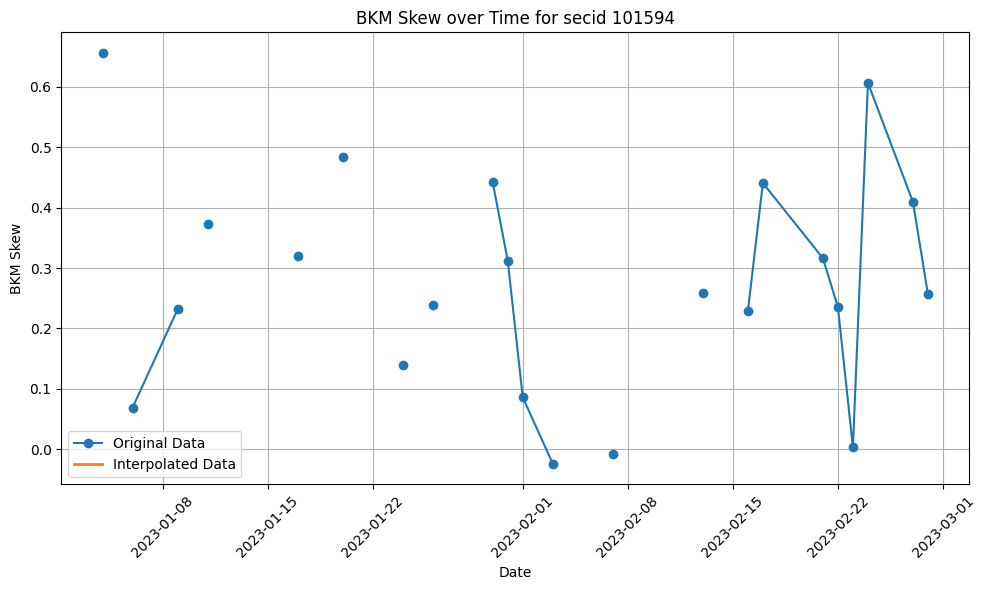

In [363]:
from scipy.interpolate import interp1d

# Filter data for the specific secid
secid_data = all_data[all_data['secid'] == 101594]

# Aggregate data by date and calculate the mean BKM skew for each date
secid_data = secid_data.groupby('date')['BKM_skew'].mean().reset_index()

# Sort the data by date
secid_data = secid_data.sort_values(by='date')

# Perform interpolation for smoother line
f = interp1d(secid_data.index, secid_data['BKM_skew'], kind='cubic')

# Generate new indices for interpolation
new_indices = np.linspace(0, len(secid_data) - 1, 1000)

# Plot BKM skew over time
plt.figure(figsize=(10, 6))
plt.plot(secid_data['date'], secid_data['BKM_skew'], marker='o', linestyle='-', label='Original Data')
plt.plot(secid_data['date'].iloc[0] + pd.to_timedelta(new_indices, unit='D'), f(new_indices), linestyle='-', linewidth=2, label='Interpolated Data')
plt.title('BKM Skew over Time for secid 101594')
plt.xlabel('Date')
plt.ylabel('BKM Skew')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [355]:
#Smirk type of skew, just to check my BKM results. open interest weighted put IV - open interest weighted call IV
sample_filtered = all_data[all_data['open_interest'] != 0]

# Drop rows with NaN values in the implied volatility column
sample_filtered = sample_filtered.dropna(subset=['impl_volatility'])

# Strip extra spaces from column names
sample_filtered.columns = sample_filtered.columns.str.strip()

# Group by date, secid, and cp_flag (call/put flag)
grouped_data = sample_filtered.groupby(['date', 'secid'])

# Define a function to calculate option implied skew
def calculate_implied_skew(group):
    total_oi_call = group.loc[group['cp_flag'] == 'C', 'open_interest'].sum()
    total_oi_put = group.loc[group['cp_flag'] == 'P', 'open_interest'].sum()
    total_iv_call = (group.loc[group['cp_flag'] == 'C', 'impl_volatility'] * group.loc[group['cp_flag'] == 'C', 'open_interest']).sum()
    total_iv_put = (group.loc[group['cp_flag'] == 'P', 'impl_volatility'] * group.loc[group['cp_flag'] == 'P', 'open_interest']).sum()

    if total_oi_call != 0 and total_oi_put != 0:
        implied_skew = (total_iv_put / total_oi_put) - (total_iv_call / total_oi_call)
    else:
        implied_skew = None
    
    return pd.Series({
        'implied_skew': implied_skew,
        'open_interest_call': total_oi_call,
        'open_interest_put': total_oi_put,
        'implied_volatility_call': total_iv_call / total_oi_call if total_oi_call != 0 else None,
        'implied_volatility_put': total_iv_put / total_oi_put if total_oi_put != 0 else None
    })

# Apply the function to each group and reset index
implied_skew_data = grouped_data.apply(calculate_implied_skew).reset_index()

# Sort DataFrame by date
implied_skew_data.sort_values(by='date', inplace=True)

# Reset index
implied_skew_data.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(implied_skew_data)


         date   secid  implied_skew  open_interest_call  open_interest_put  \
0  2023-01-03  101594           NaN             30258.0                0.0   
1  2023-01-03  108105     -0.135919            404917.0           951563.0   
2  2023-01-04  101594           NaN              7501.0                0.0   
3  2023-01-04  108105      0.044627            458631.0          1133123.0   
4  2023-01-05  101594           NaN             73329.0                0.0   
..        ...     ...           ...                 ...                ...   
70 2023-02-24  108105     -0.012689            714815.0          1112040.0   
71 2023-02-27  101594           NaN             59037.0                0.0   
72 2023-02-27  108105     -0.039134            799778.0           937475.0   
73 2023-02-28  101594           NaN             52878.0                0.0   
74 2023-02-28  108105     -0.205035            849823.0           829022.0   

    implied_volatility_call  implied_volatility_put  
0        

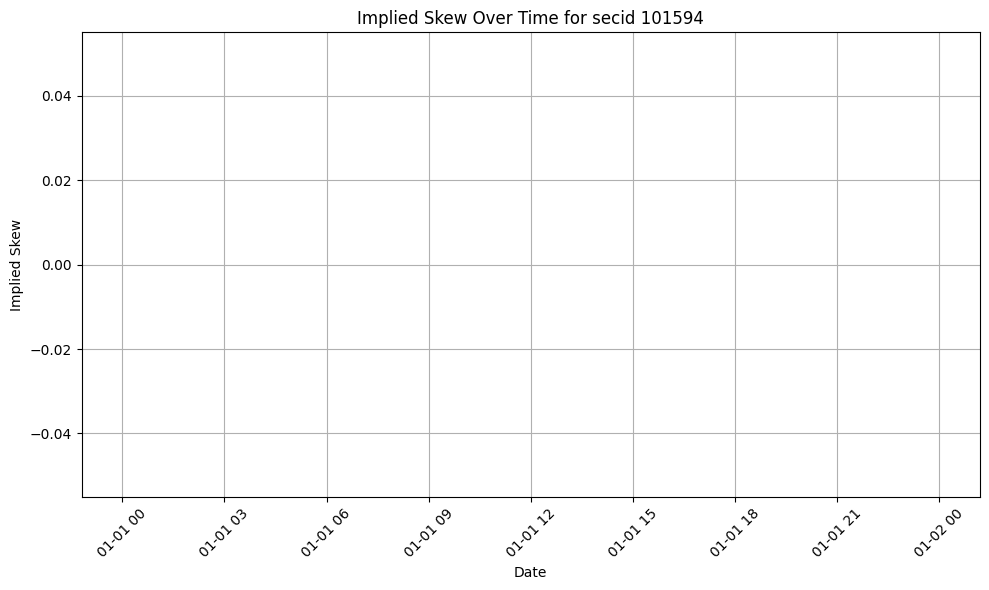

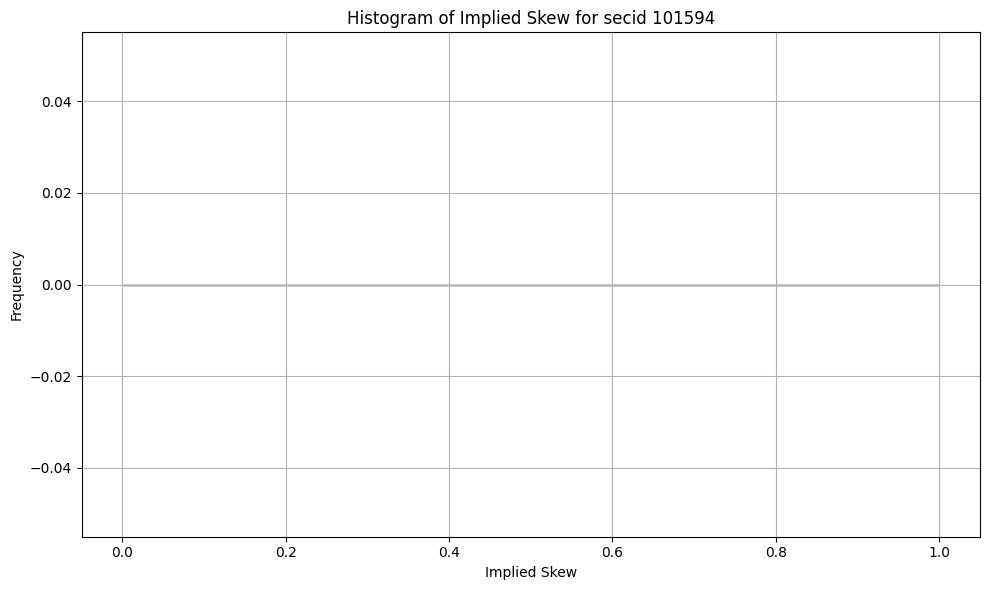

In [356]:
# Filter data for secid 101594
secid_101594_data = implied_skew_data[implied_skew_data['secid'] == 101594]

# Plot implied skew over time
plt.figure(figsize=(10, 6))
plt.plot(secid_101594_data['date'], secid_101594_data['implied_skew'], marker='o', linestyle='-')
plt.title('Implied Skew Over Time for secid 101594')
plt.xlabel('Date')
plt.ylabel('Implied Skew')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter data for secid 101594 and remove any NaN values
secid_101594_data_skew = secid_101594_data['implied_skew'].dropna()

# Plot histogram of implied skew values
plt.figure(figsize=(10, 6))
plt.hist(secid_101594_data_skew, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Implied Skew for secid 101594')
plt.xlabel('Implied Skew')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

